In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py,os,glob

In [2]:
from scipy.optimize import curve_fit

def fit(function,x,y,p0=None,sigma=None,bounds=[None,None]):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma,bounds=bounds)
    xc = np.linspace(min(x),max(x),len(x))
    curve = function(xc,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,xc,curve,perr

def gaussian(x, a, x0, sigma, d):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + d

In [9]:
run=1192478
pathSave='/UserData/maddalena/sacla2022/03-h5analysis/'
os.chdir(pathSave)
files = glob.glob(f"IqPhi_{run}*.h5")

f = h5py.File(files[0],'r')
q = f['q'][:]
Phi = f['phi'][:]
I2d = []
for file in files[1:]:
    f = h5py.File(pathSave+file,'r')
    I2d            += f['I']  

In [38]:




def find_peaks(runs,qrange,Phirange):
    pathSave='/UserData/maddalena/sacla2022/03-h5analysis/'
    files=[]
    for run in runs:
        os.chdir(pathSave)
        for file in glob.glob(f"IqPhi_{run}*.h5"):
            files.append(file)

    f = h5py.File(files[0],'r')
    q = f['q'][:]
    Phi = f['phi'][:]

    I2d = []
    for file in files[:]:
        f = h5py.File(file,'r')
        I2d            += f['I']  

    # get 1d I
    I2d=np.array(I2d)
    I2d[I2d==0]=np.nan
    I=np.nanmean(I2d[:,Phirange,:],axis=1)

    # definition of hits and miss
    miss = (np.mean(I[:,qrange],axis=1)>1)&(np.mean(I[:,qrange],axis=1)<50)&(np.mean(I[:,:],axis=1)!=0)
    hits = (np.mean(I[:, qrange],axis=1)>150)&(np.mean(I[:,qrange],axis=1)<=300)
    ice = (np.mean(I[:,qrange],axis=1)>=300)
    I_hits = I[hits,:]
    
    #print results
    print(f'number of ice ={sum(ice)}')
    print(f'number of water= {sum(hits)}')
    print(f'number of bkg ={sum(miss)}' )
    print(f'droplet hit rate = {(sum(hits)+sum(ice))/len(hits)}')
    print(f'liquid hit rate = {(sum(hits))/len(hits)*100:.3f}%')
    print(f'ice hit rate = {sum(ice)/len(hits)}')
    
    plt.figure()

    bkg=np.mean(I[miss,:],axis=0)
    I_hits=I[hits,:]
    xmin=230
    xmax=-1
    qmax=np.zeros(sum(hits))
    dqmax=np.zeros(sum(hits))
    
    for i in range(np.size(I_hits,0)):
        I_corrected=I_hits[i,:]-bkg
        popt,xc,curve,perr = fit(gaussian, q[xmin:xmax], I_corrected[xmin:xmax], p0=[350,1.8,.3, 50])   
        qmax[i]=popt[1]
        dqmax[i]=perr[1]
        plt.plot(q,I_corrected)
        plt.plot(q[xmin:xmax],curve)
        
    #plot ave hits and miss
    np.savez(f'/UserData/maddalena/sacla2022/05-processed_I/peaks_{run}.npz', hit_rate=(sum(hits))/np.size(I2d,0),
             ice_count=sum(ice),
             q=q,
             peaks=qmax,
             I=np.mean(I[hits,:],axis=0) - np.mean(I[miss,:],axis=0),
             I_ice= np.mean(I[ice,:],axis=0),
             I_bkg= np.mean(I[miss,:],axis=0))
            
    return sum(hits),qmax


[1192503, 1192504]
number of ice =406
number of water= 2218
number of bkg =15245
droplet hit rate = 0.13798180575274754
liquid hit rate = 11.663%
ice hit rate = 0.021349319030341273
[1192506, 1192507, 1192508]
number of ice =69
number of water= 422
number of bkg =28149
droplet hit rate = 0.016915868531661268
liquid hit rate = 1.454%
ice hit rate = 0.002377179080824089
[1192510, 1192511, 1192512]
number of ice =79
number of water= 848
number of bkg =24983
droplet hit rate = 0.031936884172810584
liquid hit rate = 2.922%
ice hit rate = 0.0027216977881898987
[1192514, 1192515, 1192516, 1192517, 1192518]
number of ice =61
number of water= 439
number of bkg =48069
droplet hit rate = 0.01019492700432265
liquid hit rate = 0.895%
ice hit rate = 0.0012437810945273632
[1192520, 1192521, 1192522, 1192523, 1192524, 1192525]
number of ice =21
number of water= 127
number of bkg =58731
droplet hit rate = 0.002506223223206272
liquid hit rate = 0.215%
ice hit rate = 0.00035561275464413326
[1192527, 1192

/home/girelli/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


[1192536, 1192539, 1192541, 1192542, 1192543, 1192544, 1192545, 1192546]
number of ice =20
number of water= 67
number of bkg =75770
droplet hit rate = 0.00110027696627082
liquid hit rate = 0.085%
ice hit rate = 0.00025293723362547585
[1192558, 1192559, 1192560, 1192561, 1192562, 1192563, 1192564, 1192565]
number of ice =13
number of water= 74
number of bkg =73325
droplet hit rate = 0.00110027696627082
liquid hit rate = 0.094%
ice hit rate = 0.0001644092018565593
[1192567, 1192568, 1192569, 1192570, 1192571, 1192572, 1192573]
number of ice =10
number of water= 63
number of bkg =68884
droplet hit rate = 0.001057021227303003
liquid hit rate = 0.091%
ice hit rate = 0.00014479742839767167
[1192578, 1192579, 1192580, 1192581, 1192593, 1192594]
number of ice =0
number of water= 24
number of bkg =57460
droplet hit rate = 0.0004064076946523521
liquid hit rate = 0.041%
ice hit rate = 0.0


/home/girelli/aqua/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/girelli/aqua/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[1192610]
number of ice =0
number of water= 2
number of bkg =8993
droplet hit rate = 0.00022202486678507994
liquid hit rate = 0.022%
ice hit rate = 0.0


/home/girelli/aqua/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


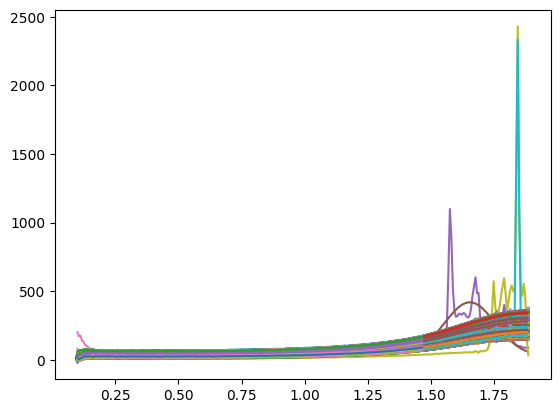

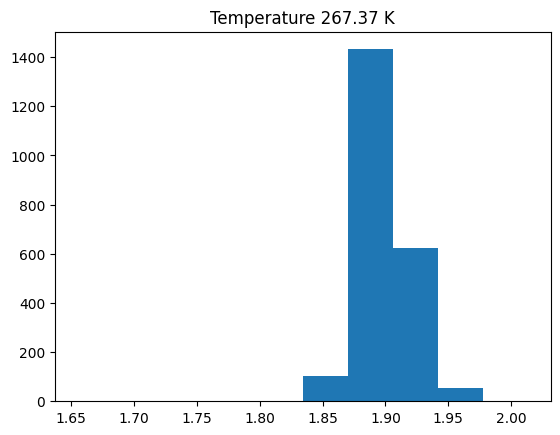

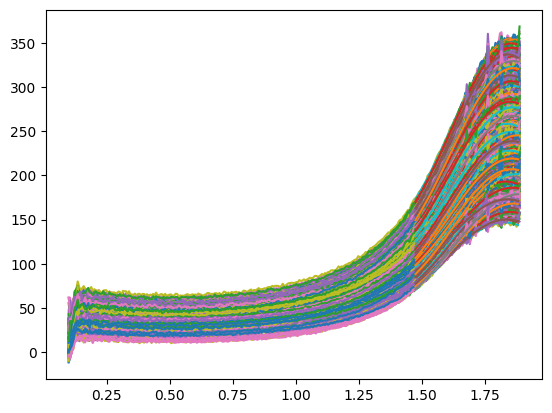

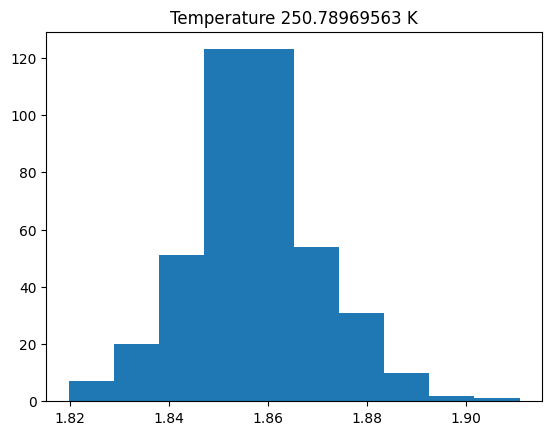

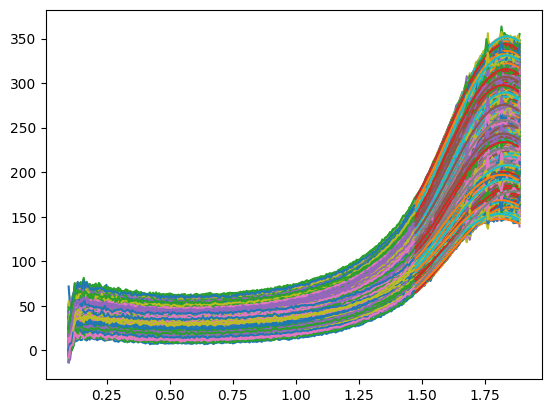

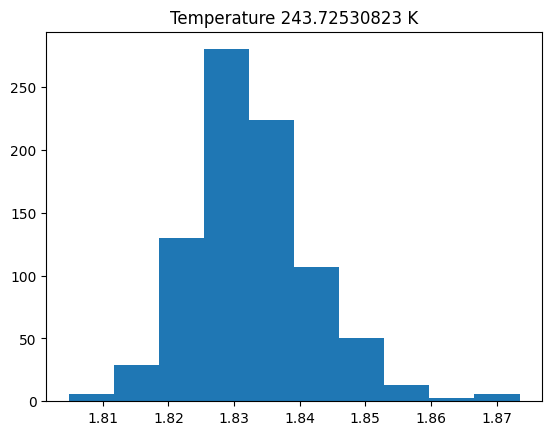

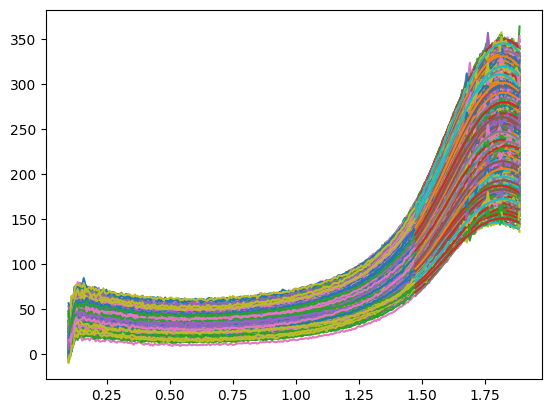

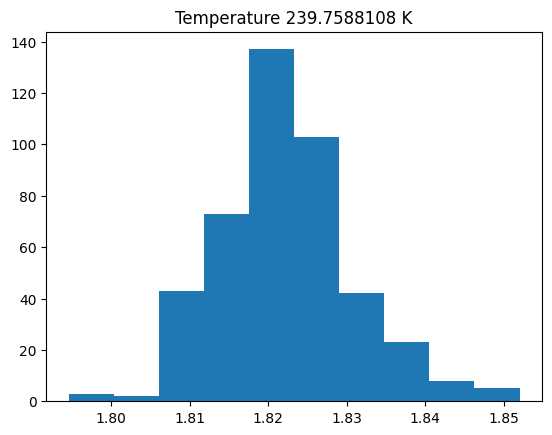

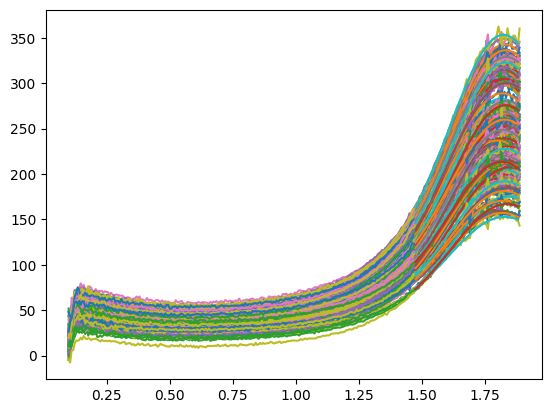

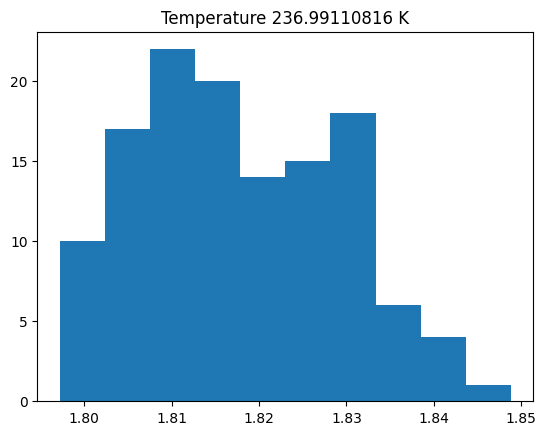

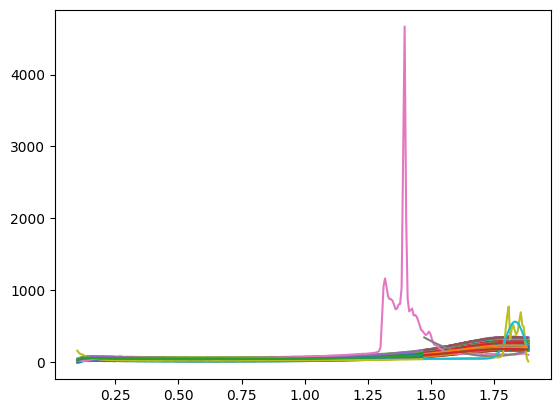

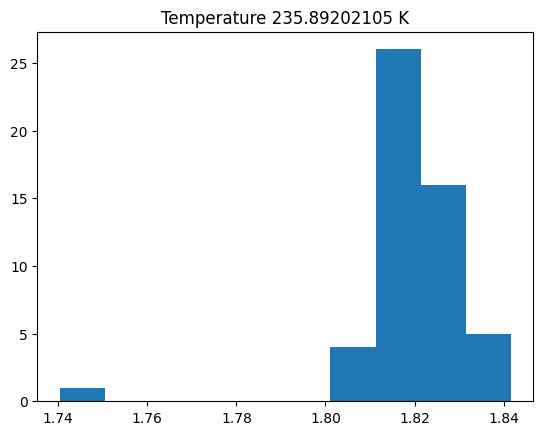

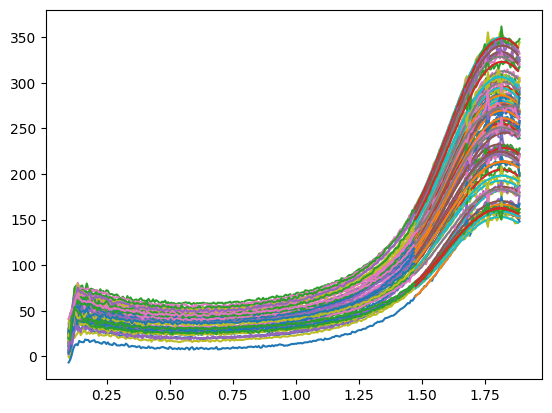

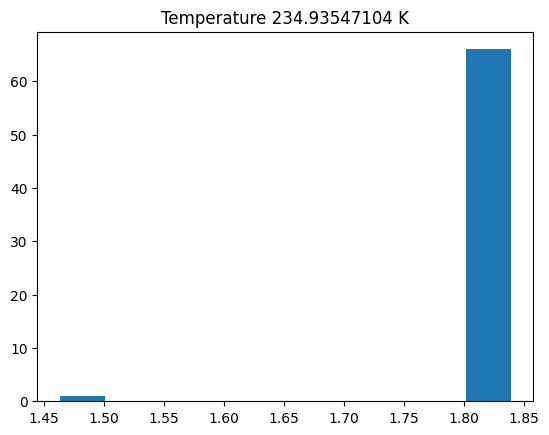

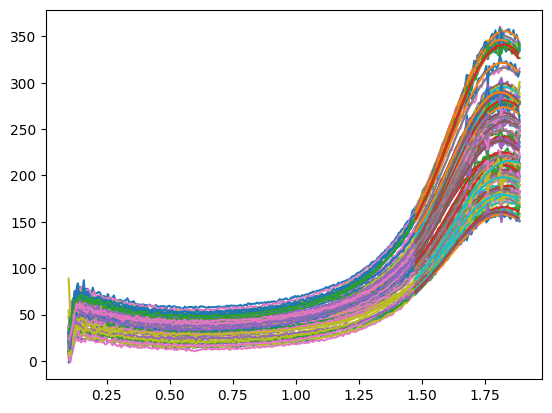

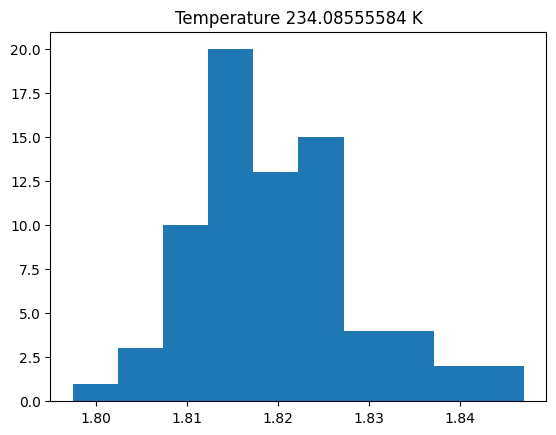

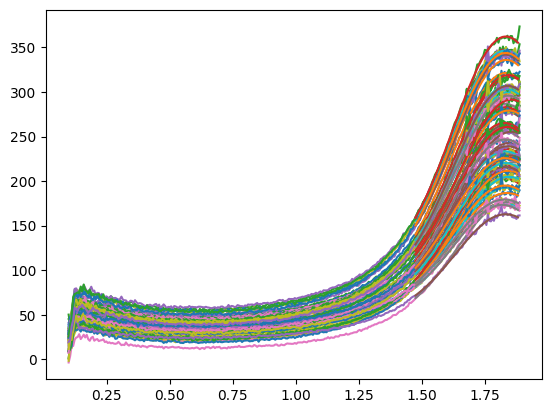

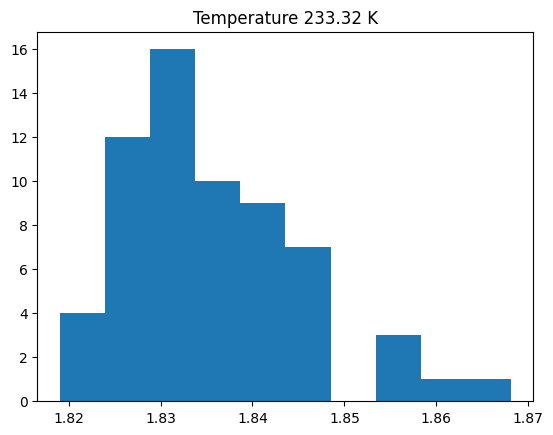

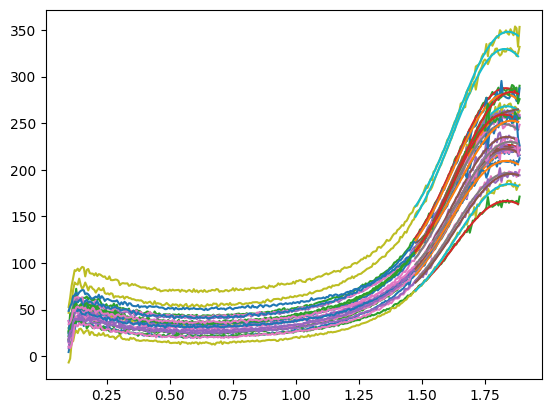

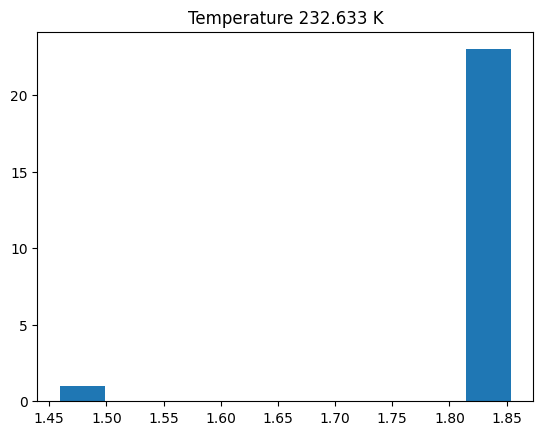

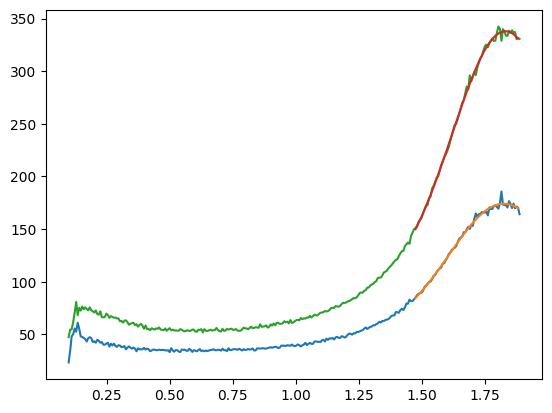

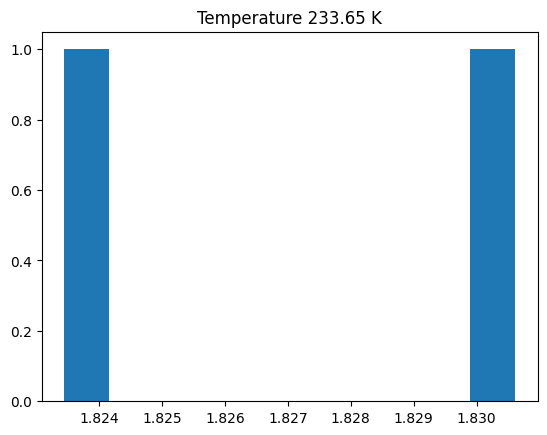

In [65]:
temperature = [267.37,262,256.5,250.79,245,241.5,238.3,236.9,235.9,234.9,234.1,233.32,] 

qrange=q>1.4
Phirange=Phi<181
runs = [[1192623], # 5
        [1192624,1192625], # 7
        [1192626], # 12
        [1192627,1192628,1192630], # 15
        [1192632,1192633,1192634,1192635], # 22
        [1192636,1192639,1192640,1192643,1192644], # 30
        [1192645,1192654,1192656,1192657], #40
        [1192660,1192661,1192662], # 45
        [1192668,1192669,1192672,1192673,1192674], # 50
        [1192678,1192679,1192680], # 55
        [1192684,1192685,1192696], # 60
        [1192699,1192700,1192701,1192702,1192703,1192704,1192705,1192706,1192707,1192708]#65
        ]


posz = [5,15,26,35,45,50,55,60,65,70,62.5]#,10,15,20,25,30,35,40]
temperature=[267.37, 250.78969563,243.72530823, 239.7588108,  236.99110816,235.89202105, 234.93547104,234.08555584,233.32,232.633,233.65]

#65.0	233.32218870531557
#70.0	232.63304923913267
#75.0	232.00617620267658
#80.0	231.43221641175697
# these are the runs with another droplet size
runs = [[1192503,1192504], # 5
        [1192506,1192507,1192508], # 15
        [1192510,1192511,1192512], # 26  
        [1192514,1192515,1192516,1192517,1192518], # 35  
        [1192520,1192521,1192522,1192523,1192524,1192525], # 45 
        [1192527,1192528,1192529,1192530,1192532,1192533],#50
        [1192536,1192539,1192541,1192542,1192543,1192544,1192545,1192546],#55 (1192537, 1192538,1192540 do not have anyhits)
        [1192558,1192559,1192560,1192561,1192562,1192563,1192564,1192565], ##60
        [1192567,1192568,1192569,1192570,1192571,1192572,1192573],##65
        [1192578,1192579,1192580,1192581,1192593,1192594,],##70
        [1192610],##62.5
        
       ]



tot_hits=0
distribution=[]
i=0
for i,runlist in enumerate(runs):
    
    print(runlist)
    print(temperure)
    
    tot_hits,qmax=find_peaks(runlist,qrange,Phirange)
    plt.figure()
    distribution.append(plt.hist(qmax))
    plt.title(f'Temperature {temperature[i]} K')
    i=i+1

Text(0, 0.5, 'distribution peak position')

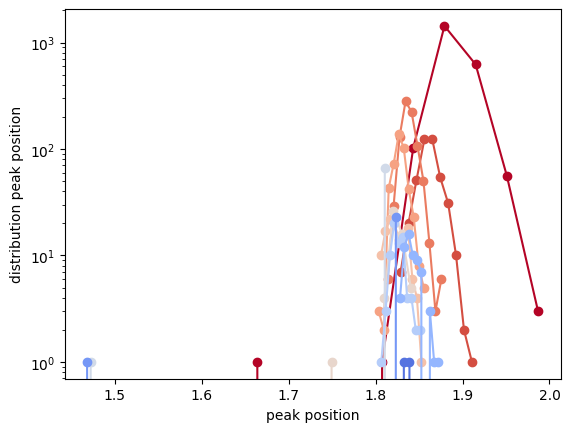

In [73]:
plt.figure()

col = plt.cm.coolwarm_r(np.linspace(0,1,len(distribution)+1))

for i,distr in enumerate(distribution):
    plt.plot(distr[1][:-1]+np.diff(distribution[1][1])[0],distr[0],marker='o',color=col[i])

plt.yscale('log')
plt.xlabel('peak position')
plt.ylabel('distribution peak position')


In [30]:
pathSave='/UserData/maddalena/sacla2022/03-h5analysis/'
files=(glob.glob(f"IqPhi_{runs[0]}*.h5")[:])
for run in runs:
    os.chdir(pathSave)
    for file in glob.glob(f"IqPhi_{run}*.h5"):
        files.append(file)
print(files)

['IqPhi_1192510_336952808_336954808.h5', 'IqPhi_1192510_336948808_336950808.h5', 'IqPhi_1192510_336954808_336956808.h5', 'IqPhi_1192510_336956808_336958808.h5', 'IqPhi_1192510_336958808_336960808.h5', 'IqPhi_1192510_336960808_336962808.h5', 'IqPhi_1192510_336964808_336966808.h5', 'IqPhi_1192510_336962808_336964808.h5', 'IqPhi_1192510_336950808_336952808.h5', 'IqPhi_1192510_336966808_336968806.h5', 'IqPhi_1192510_336952808_336954808.h5', 'IqPhi_1192510_336948808_336950808.h5', 'IqPhi_1192510_336954808_336956808.h5', 'IqPhi_1192510_336956808_336958808.h5', 'IqPhi_1192510_336958808_336960808.h5', 'IqPhi_1192510_336960808_336962808.h5', 'IqPhi_1192510_336964808_336966808.h5', 'IqPhi_1192510_336962808_336964808.h5', 'IqPhi_1192510_336950808_336952808.h5', 'IqPhi_1192510_336966808_336968806.h5', 'IqPhi_1192511_337029062_337031062.h5', 'IqPhi_1192511_337039062_337041062.h5', 'IqPhi_1192511_337027062_337029062.h5', 'IqPhi_1192511_337031062_337033062.h5', 'IqPhi_1192511_337037062_337039062.h5',

In [29]:
glob.glob(f"IqPhi_{run}*.h5")

['IqPhi_1192512_337049224_337051224.h5',
 'IqPhi_1192512_337063224_337065224.h5',
 'IqPhi_1192512_337055224_337057224.h5',
 'IqPhi_1192512_337059224_337061224.h5',
 'IqPhi_1192512_337065224_337067224.h5',
 'IqPhi_1192512_337057224_337059224.h5',
 'IqPhi_1192512_337061224_337063224.h5',
 'IqPhi_1192512_337067224_337069222.h5',
 'IqPhi_1192512_337051224_337053224.h5',
 'IqPhi_1192512_337053224_337055224.h5']